In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [2]:
ms_1 = pd.read_csv('celiac_good_data.csv')
celiac_1 = pd.read_csv('ms_good_data.csv')

In [3]:
ms_1

,Unnamed: 0,Abiotrophia,Acidaminococcus,Acinetobacter,Actinomyces,Adlercreutzia,Aggregatibacter,Akkermansia,Alistipes,Anaerofustis,...,Staphylococcus,Stenotrophomonas,Stomatobaculum,Streptococcus,Subdoligranulum,Sutterella,Tannerella,Turicibacter,Tyzzerella,Veillonella
0,Case_1_18_month,0.0,0.0,0.0,0.00,0.0,0.00,0.00,208.72,0.0,...,0.00,0.0,0.0,3199.96,3894.01,0.00,0.0,0.00,8950.50,20181.21
1,Case_1_21_month,0.0,0.0,0.0,558.78,0.0,2267.11,0.00,0.00,0.0,...,976.48,0.0,0.0,21972.98,0.00,0.00,0.0,0.00,8878.39,31275.21
2,Case_1_24_month,0.0,0.0,0.0,2898.92,0.0,212.62,0.00,0.00,0.0,...,0.00,0.0,0.0,13001.11,0.00,0.00,0.0,195.97,8951.84,30488.17
3,Case_1_27_month,0.0,0.0,0.0,0.00,0.0,0.00,0.00,2212.72,0.0,...,0.00,0.0,0.0,9726.84,0.00,649.54,0.0,0.00,4997.00,36401.79
4,Control_1_3_month,0.0,0.0,0.0,6737.84,0.0,0.00,0.00,0.00,0.0,...,1656.17,0.0,0.0,13375.24,0.00,0.00,0.0,0.00,0.00,5566.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Control_10_9_month,0.0,0.0,0.0,0.00,0.0,0.00,293.99,9524.33,0.0,...,0.00,0.0,0.0,7205.10,959.28,0.00,0.0,0.00,4228.72,4779.37
159,Control_10_12_month,0.0,0.0,0.0,0.00,0.0,0.00,0.00,476.81,0.0,...,0.00,0.0,0.0,4837.48,0.00,0.00,0.0,0.00,4127.15,1901.19
160,Control_10_15_month,0.0,0.0,0.0,0.00,0.0,0.00,212.98,27924.29,0.0,...,0.00,0.0,0.0,4913.56,0.00,462.27,0.0,0.00,5921.27,26795.47
161,Control_10_18_month,0.0,0.0,0.0,0.00,0.0,0.00,0.00,5170.60,0.0,...,0.00,0.0,0.0,0.00,0.00,6518.79,0.0,0.00,0.00,14148.41


In [4]:
celiac_1

,Unnamed: 0,Acetanaerobacterium,Acetivibrio,Acholeplasmatales,Actinobaculum,Actinomyces,Akkermansia,Alistipes,Allisonella,Alloprevotella,...,Streptococcus,Succinivibrio,Sutterella,Tissierellia,Traorella,Turicibacter,Tyzzerella,Varibaculum,Veillonella,Victivallaceae
0,1,0,0,0,0,0,19,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,0,0,0,0,0,15,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,0,0,0,0,0,17,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3,4,0,0,0,0,0,19,0,0,0,...,0,0,0,0,3,0,0,0,0,0
4,5,0,0,0,0,1,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,188,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188,189,0,0,0,0,0,10,4,0,0,...,0,0,2,0,0,0,0,0,0,0
189,190,0,0,0,0,0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
190,191,0,0,0,0,0,1,3,0,0,...,0,0,2,0,0,0,0,0,0,0


In [5]:
# Drop the unnamed column
ms_1 = ms_1.drop(ms_1.columns[0], axis=1)
celiac_1 = celiac_1.drop(celiac_1.columns[0], axis=1)

In [6]:
ms_1

,Abiotrophia,Acidaminococcus,Acinetobacter,Actinomyces,Adlercreutzia,Aggregatibacter,Akkermansia,Alistipes,Anaerofustis,Anaeroglobus,...,Staphylococcus,Stenotrophomonas,Stomatobaculum,Streptococcus,Subdoligranulum,Sutterella,Tannerella,Turicibacter,Tyzzerella,Veillonella
0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,208.72,0.0,0.0,...,0.00,0.0,0.0,3199.96,3894.01,0.00,0.0,0.00,8950.50,20181.21
1,0.0,0.0,0.0,558.78,0.0,2267.11,0.00,0.00,0.0,0.0,...,976.48,0.0,0.0,21972.98,0.00,0.00,0.0,0.00,8878.39,31275.21
2,0.0,0.0,0.0,2898.92,0.0,212.62,0.00,0.00,0.0,0.0,...,0.00,0.0,0.0,13001.11,0.00,0.00,0.0,195.97,8951.84,30488.17
3,0.0,0.0,0.0,0.00,0.0,0.00,0.00,2212.72,0.0,0.0,...,0.00,0.0,0.0,9726.84,0.00,649.54,0.0,0.00,4997.00,36401.79
4,0.0,0.0,0.0,6737.84,0.0,0.00,0.00,0.00,0.0,0.0,...,1656.17,0.0,0.0,13375.24,0.00,0.00,0.0,0.00,0.00,5566.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.0,0.0,0.0,0.00,0.0,0.00,293.99,9524.33,0.0,0.0,...,0.00,0.0,0.0,7205.10,959.28,0.00,0.0,0.00,4228.72,4779.37
159,0.0,0.0,0.0,0.00,0.0,0.00,0.00,476.81,0.0,0.0,...,0.00,0.0,0.0,4837.48,0.00,0.00,0.0,0.00,4127.15,1901.19
160,0.0,0.0,0.0,0.00,0.0,0.00,212.98,27924.29,0.0,0.0,...,0.00,0.0,0.0,4913.56,0.00,462.27,0.0,0.00,5921.27,26795.47
161,0.0,0.0,0.0,0.00,0.0,0.00,0.00,5170.60,0.0,0.0,...,0.00,0.0,0.0,0.00,0.00,6518.79,0.0,0.00,0.00,14148.41


In [7]:
#we want to get the dfs of the same len so we don't get unexpected errors in the process


min_len = min(len(ms_1), len(celiac_1))

# trim the longer series to match the shortest series
ms_good = ms_1[:min_len]
celiac_good = celiac_1[:min_len]

Alpha diversity

In [8]:
#Function that calculates shannon diversity for you

def shannon_div(data):
    # Convert all data to numeric, coercing errors to NaN
    data = data.apply(pd.to_numeric, errors='coerce')

    data = data.replace(0, 1e-10)  # Replace zeros with a very small number
    proportions = data.div(data.sum(axis=1), axis=0)
    shannon_index = -np.sum(proportions * np.log(proportions), axis=1)
    return shannon_index

In [9]:
#function that calculates simpson diversity for you

def simpson_div(data):
    proportions = data.div(data.sum(axis=1), axis=0)
    simpson_index = 1 - np.sum(proportions**2, axis=1)
    return simpson_index


In [10]:
# Calculate diversity indices for each sample in both datasets
#MS_shannon =
#Celiac_shannon =

In [11]:
# Calculate diversity indices for each sample in both datasets
MS_shannon = shannon_div(ms_good)
Celiac_shannon = shannon_div(celiac_good)

In [12]:
#do the same for the simpson index

In [13]:
MS_simpson = simpson_div(ms_good)
Celiac_simpson = simpson_div(celiac_good)

In [14]:
Celiac_simpson

0      0.812764
1      0.824509
2      0.716253
3      0.761493
4      0.808198
         ...   
158    0.743490
159    0.648437
160    0.895556
161    0.880907
162    0.733728
Length: 163, dtype: float64

In [15]:
# Check for NaNs in the original data
print(MS_shannon.isnull().sum())
print(Celiac_shannon.isnull().sum())
print(MS_simpson.isnull().sum())
print(Celiac_simpson.isnull().sum())

0
0
0
0


In [16]:
#lets melt (as if we dont melt from the +40 celcius outside)

# Prepare data for plotting
alpha_diversity_df = pd.DataFrame({
    'Shannon_MS': MS_shannon,
    'Shannon_Celiac': Celiac_shannon,
    'Simpson_MS': MS_simpson,
    'Simpson_Celiac': Celiac_simpson,
}).melt(var_name='Index', value_name='Diversity')

In [17]:
# Check for NaNs after melting
print(alpha_diversity_df.isnull().sum())

Index        0
Diversity    0
dtype: int64


In [18]:
alpha_diversity_df

,Index,Diversity
0,Shannon_MS,2.675420
1,Shannon_MS,2.161887
2,Shannon_MS,2.188467
3,Shannon_MS,1.965879
4,Shannon_MS,1.145313
...,...,...
647,Simpson_Celiac,0.743490
648,Simpson_Celiac,0.648437
649,Simpson_Celiac,0.895556
650,Simpson_Celiac,0.880907


In [19]:
# Filter data for individual plots
shannon_df = alpha_diversity_df[alpha_diversity_df['Index'].str.contains('Shannon')]
simpson_df = alpha_diversity_df[alpha_diversity_df['Index'].str.contains('Simpson')]

In [20]:
# Function to plot boxplots and violin plots
#but you can try to plot them by yourself as well!
def plot_diversity(index_df, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Index', y='Diversity', data=index_df)
    plt.title(f'{title} Boxplot')
    plt.ylabel('Diversity')
    plt.show()

    plt.figure(figsize=(14, 6))
    sns.violinplot(x='Index', y='Diversity', data=index_df)
    plt.title(f'{title} Violin Plot')
    plt.ylabel('Diversity')
    plt.show()

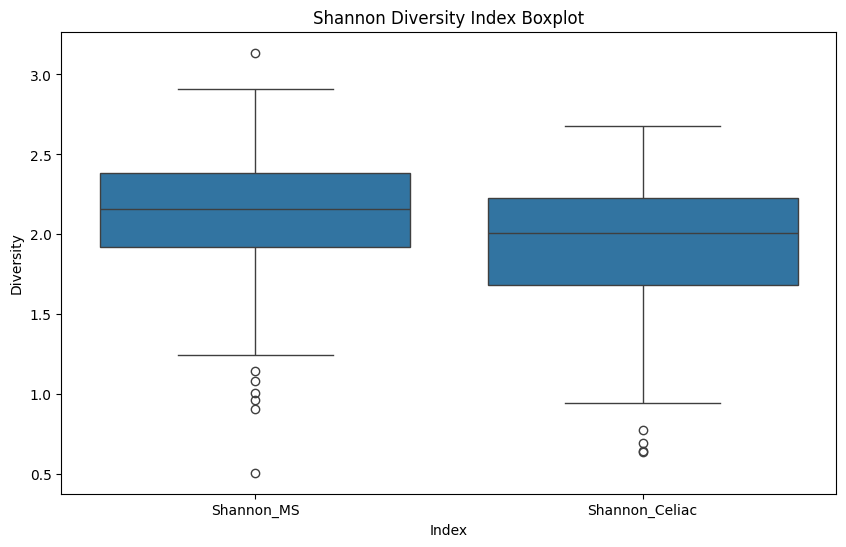

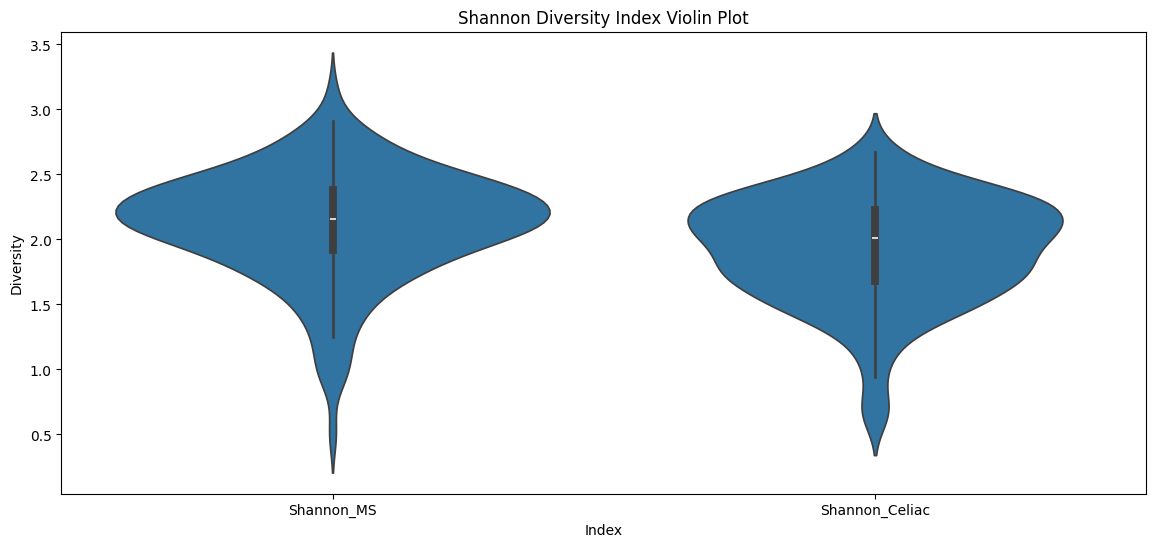

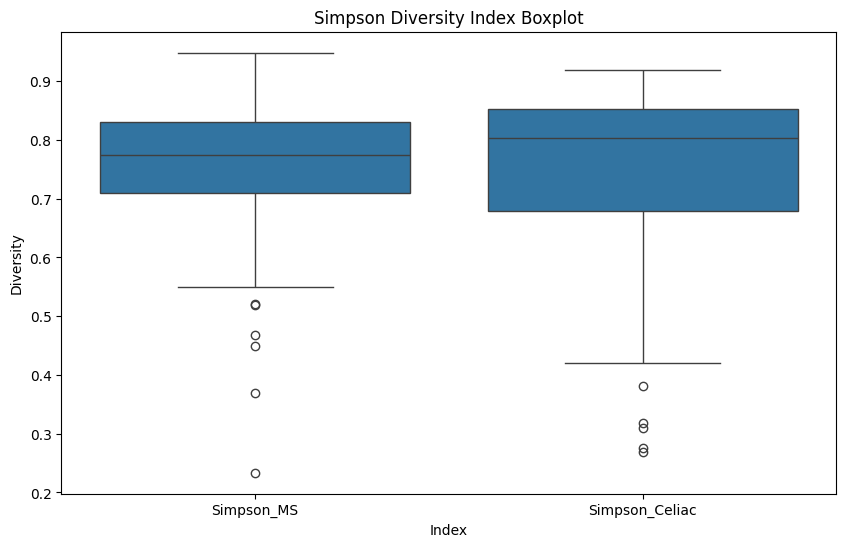

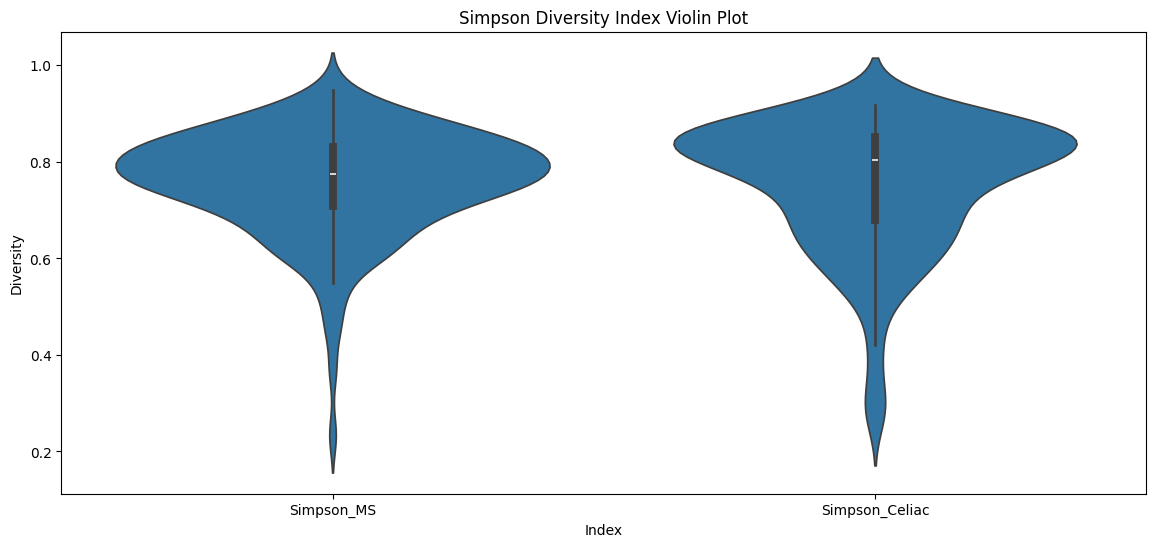

In [21]:
# Plot Shannon Diversity
plot_diversity(shannon_df, 'Shannon Diversity Index')

# Plot Simpson Diversity
plot_diversity(simpson_df, 'Simpson Diversity Index')

In [22]:
# Statistical significance test for shannon!


# T-test
t_stat, p_val_ttest = ttest_ind(MS_shannon, Celiac_shannon)

# Mann-Whitney U test (non-parametric)
u_stat, p_val_mannwhitney = mannwhitneyu(MS_shannon, Celiac_shannon)

print(f"T-test p-value: {p_val_ttest}")
print(f"Mann-Whitney U test p-value: {p_val_mannwhitney}")

# Display the combined dataframe with alpha diversity values
print(alpha_diversity_df)


T-test p-value: 1.593402795612762e-05
Mann-Whitney U test p-value: 4.6511497711230566e-06
              Index  Diversity
0        Shannon_MS   2.675420
1        Shannon_MS   2.161887
2        Shannon_MS   2.188467
3        Shannon_MS   1.965879
4        Shannon_MS   1.145313
..              ...        ...
647  Simpson_Celiac   0.743490
648  Simpson_Celiac   0.648437
649  Simpson_Celiac   0.895556
650  Simpson_Celiac   0.880907
651  Simpson_Celiac   0.733728

[652 rows x 2 columns]


In [23]:
#please do the same for the simpson

In [24]:
# T-test
t_stat, p_val_ttest = ttest_ind(MS_simpson, Celiac_simpson)

# Mann-Whitney U test (non-parametric)
u_stat, p_val_mannwhitney = mannwhitneyu(MS_simpson, Celiac_simpson)

print(f"T-test p-value: {p_val_ttest}")
print(f"Mann-Whitney U test p-value: {p_val_mannwhitney}")

# Display the combined dataframe with alpha diversity values
print(alpha_diversity_df)

T-test p-value: 0.6337185673429878
Mann-Whitney U test p-value: 0.4698168522147239
              Index  Diversity
0        Shannon_MS   2.675420
1        Shannon_MS   2.161887
2        Shannon_MS   2.188467
3        Shannon_MS   1.965879
4        Shannon_MS   1.145313
..              ...        ...
647  Simpson_Celiac   0.743490
648  Simpson_Celiac   0.648437
649  Simpson_Celiac   0.895556
650  Simpson_Celiac   0.880907
651  Simpson_Celiac   0.733728

[652 rows x 2 columns]


In [25]:
#the plots are boring - let's play with design

# Function to plot customized boxplots and violin plots
def plot_diversity_custom(index_df, title):
    # Set a style
    #please google which styles exist and choose the one you like the most
    sns.set_style("ticks")

    # Define a color palette
    #please google which palletes exist and choose the one you like the most
    palette = sns.color_palette("Set1")

    # Plot customized boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Index', y='Diversity', data=index_df, palette=palette)
    sns.swarmplot(x='Index', y='Diversity', data=index_df, color=".25")
    plt.title(f'{title} Boxplot', fontsize=16, fontweight='bold')
    plt.xlabel('Index', fontsize=14)
    plt.ylabel('Diversity', fontsize=14)
    plt.grid(True)
    plt.savefig(f'{title}_boxplot.png')
    plt.show()

    # Plot customized violin plot
    plt.figure(figsize=(14, 6))
    sns.violinplot(x='Index', y='Diversity', data=index_df, palette=palette)
    sns.swarmplot(x='Index', y='Diversity', data=index_df, color=".25")
    plt.title(f'{title} Violin Plot', fontsize=16, fontweight='bold')
    plt.xlabel('Index', fontsize=14)
    plt.ylabel('Diversity', fontsize=14)
    plt.grid(True)
    plt.savefig(f'{title}_violinplot.png')
    plt.show()

# Example usage
# plot_diversity_custom(alpha_diversity_df_trimmed, "Alpha Diversity")

C:\Users\pavel\AppData\Local\Temp\ipykernel_20164\49884811.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Index', y='Diversity', data=index_df, palette=palette)
C:\Users\pavel\AppData\Local\Temp\ipykernel_20164\49884811.py:15: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.boxplot(x='Index', y='Diversity', data=index_df, palette=palette)
C:\Users\pavel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pavel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the

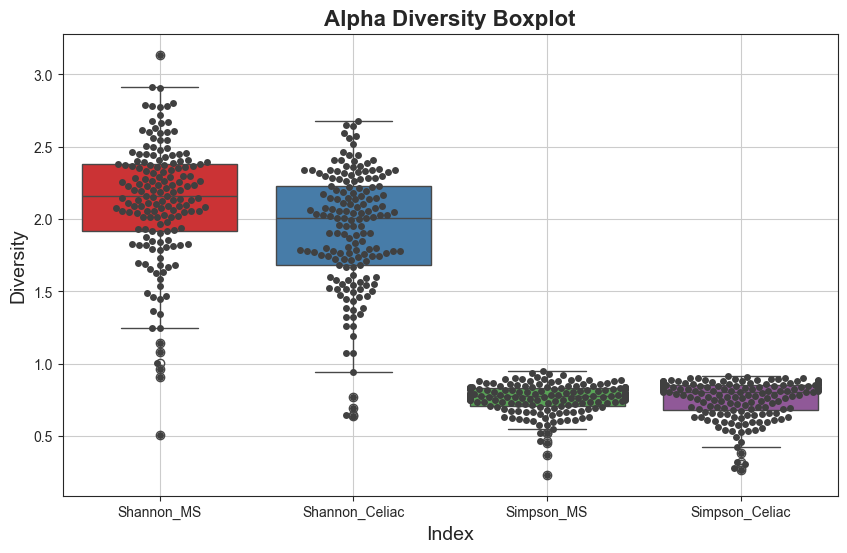

C:\Users\pavel\AppData\Local\Temp\ipykernel_20164\49884811.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Index', y='Diversity', data=index_df, palette=palette)
C:\Users\pavel\AppData\Local\Temp\ipykernel_20164\49884811.py:26: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.violinplot(x='Index', y='Diversity', data=index_df, palette=palette)
C:\Users\pavel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pavel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size 

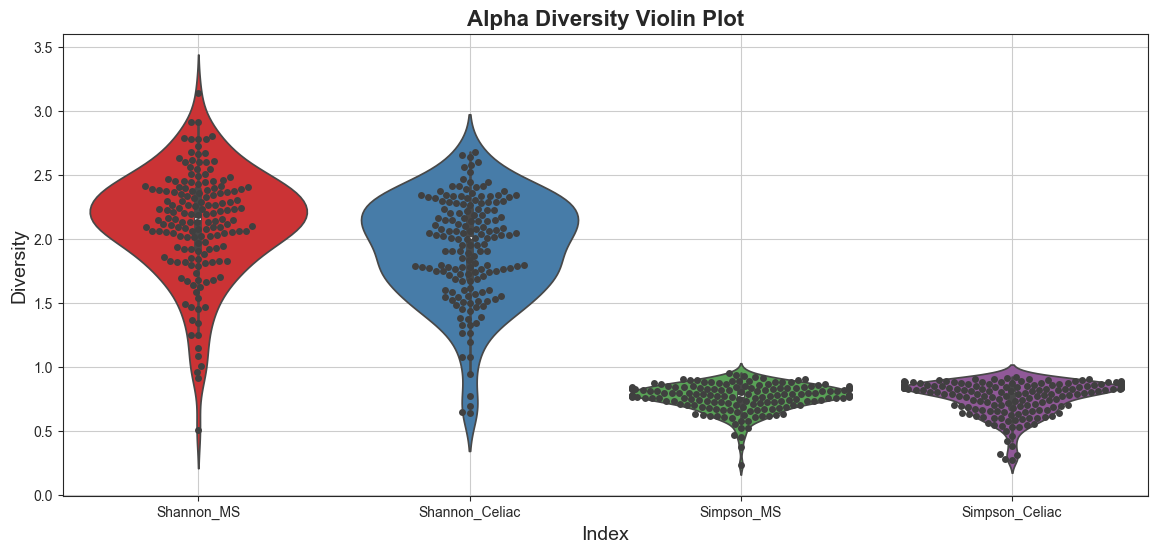

In [26]:
plot_diversity_custom(alpha_diversity_df, "Alpha Diversity")

Beta diversity

In [27]:
# Identify common genera
common_genera = list(set(celiac_1.columns).intersection(set(ms_1.columns)))

# Filter dataframes to include only common genera
df_celiac_filtered = celiac_good[common_genera]
df_ms_filtered = ms_good[common_genera]

# Ensure there are no missing values
df_celiac_filtered = df_celiac_filtered.dropna()
df_ms_filtered = df_ms_filtered.dropna()

# Display the first few rows of the filtered DataFrames
df_celiac_filtered.head(), df_ms_filtered.head()


(   Slackia  Phascolarctobacterium  Turicibacter  Megasphaera  Tyzzerella  \
 0        0                      0             0            0           0   
 1        0                      0             0            0           0   
 2        0                      0             0            0           0   
 3        0                      0             0            0           0   
 4        0                      0             0            0           0   
 
    Streptococcus  Desulfovibrio  Erysipelatoclostridium  Alistipes  \
 0              0              0                       0          0   
 1              0              0                       0          0   
 2              0              0                       0          1   
 3              0              0                       0          0   
 4              0              0                       0          7   
 
    Bifidobacterium  ...  Holdemania  Butyrivibrio  Megamonas  Butyricicoccus  \
 0                0  ...   

In [28]:
df_celiac_filtered

,Slackia,Phascolarctobacterium,Turicibacter,Megasphaera,Tyzzerella,Streptococcus,Desulfovibrio,Erysipelatoclostridium,Alistipes,Bifidobacterium,...,Holdemania,Butyrivibrio,Megamonas,Butyricicoccus,Propionibacterium,Bacteroidales,Collinsella,Ruminococcaceae,Butyricimonas,Odoribacter
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,2,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,1,0,0,0
159,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,0,0
160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,0,0,0
161,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_ms_filtered

,Slackia,Phascolarctobacterium,Turicibacter,Megasphaera,Tyzzerella,Streptococcus,Desulfovibrio,Erysipelatoclostridium,Alistipes,Bifidobacterium,...,Holdemania,Butyrivibrio,Megamonas,Butyricicoccus,Propionibacterium,Bacteroidales,Collinsella,Ruminococcaceae,Butyricimonas,Odoribacter
0,0.0,0.0,0.00,0.00,8950.50,3199.96,0.0,1402.88,208.72,63571.18,...,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
1,0.0,0.0,0.00,0.00,8878.39,21972.98,0.0,1685.33,0.00,208823.21,...,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
2,0.0,0.0,195.97,1509.25,8951.84,13001.11,0.0,2629.05,0.00,230678.92,...,0.0,0.0,0.0,0.0,133.15,0.0,0.00,0.0,0.0,0.00
3,0.0,0.0,0.00,2449.25,4997.00,9726.84,0.0,0.00,2212.72,223446.62,...,0.0,0.0,0.0,0.0,212.54,0.0,0.00,0.0,0.0,0.00
4,0.0,0.0,0.00,0.00,0.00,13375.24,0.0,0.00,0.00,161169.31,...,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.0,0.0,0.00,5229.83,4228.72,7205.10,0.0,635.08,9524.33,273775.23,...,0.0,0.0,0.0,0.0,161.81,0.0,5174.42,0.0,0.0,0.00
159,0.0,0.0,0.00,1143.43,4127.15,4837.48,0.0,920.80,476.81,192994.47,...,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
160,0.0,0.0,0.00,623.92,5921.27,4913.56,0.0,854.53,27924.29,257672.55,...,0.0,0.0,0.0,0.0,0.00,0.0,3476.65,0.0,0.0,5643.92
161,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,5170.60,52952.99,...,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,2346.18


In [30]:
df_combined = pd.concat([df_celiac_filtered, df_ms_filtered], ignore_index=True)

In [31]:
df_combined

,Slackia,Phascolarctobacterium,Turicibacter,Megasphaera,Tyzzerella,Streptococcus,Desulfovibrio,Erysipelatoclostridium,Alistipes,Bifidobacterium,...,Holdemania,Butyrivibrio,Megamonas,Butyricicoccus,Propionibacterium,Bacteroidales,Collinsella,Ruminococcaceae,Butyricimonas,Odoribacter
0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,3.00,2.0,0.0,0.00
1,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,1.00,3.0,0.0,0.00
2,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,1.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
3,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,1.00,0.0,0.0,0.00
4,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,7.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,1.00,1.0,0.0,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,0.0,0.0,0.0,5229.83,4228.72,7205.10,0.0,635.08,9524.33,273775.23,...,0.0,0.0,0.0,0.0,161.81,0.0,5174.42,0.0,0.0,0.00
322,0.0,0.0,0.0,1143.43,4127.15,4837.48,0.0,920.80,476.81,192994.47,...,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00
323,0.0,0.0,0.0,623.92,5921.27,4913.56,0.0,854.53,27924.29,257672.55,...,0.0,0.0,0.0,0.0,0.00,0.0,3476.65,0.0,0.0,5643.92
324,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,5170.60,52952.99,...,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,2346.18


In [32]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [33]:
# Compute the Bray-Curtis dissimilarity matrix
bray_curtis_dist = pdist(df_combined, metric='braycurtis')
bray_curtis_matrix = squareform(bray_curtis_dist)

In [34]:
print(bray_curtis_dist)
print(bray_curtis_matrix)

[0.2195122  0.37837838 0.23809524 ... 0.43919247 0.43603114 0.25368066]
[[0.         0.2195122  0.37837838 ... 0.99988762 0.99987799 0.9998922 ]
 [0.2195122  0.         0.3125     ... 0.99991437 0.99989726 0.99991016]
 [0.37837838 0.3125     0.         ... 0.99992508 0.99992936 0.99993412]
 ...
 [0.99988762 0.99991437 0.99992508 ... 0.         0.43919247 0.43603114]
 [0.99987799 0.99989726 0.99992936 ... 0.43919247 0.         0.25368066]
 [0.9998922  0.99991016 0.99993412 ... 0.43603114 0.25368066 0.        ]]


In [35]:
# Perform hierarchical clustering
linkage_matrix = linkage(bray_curtis_dist, method='average')

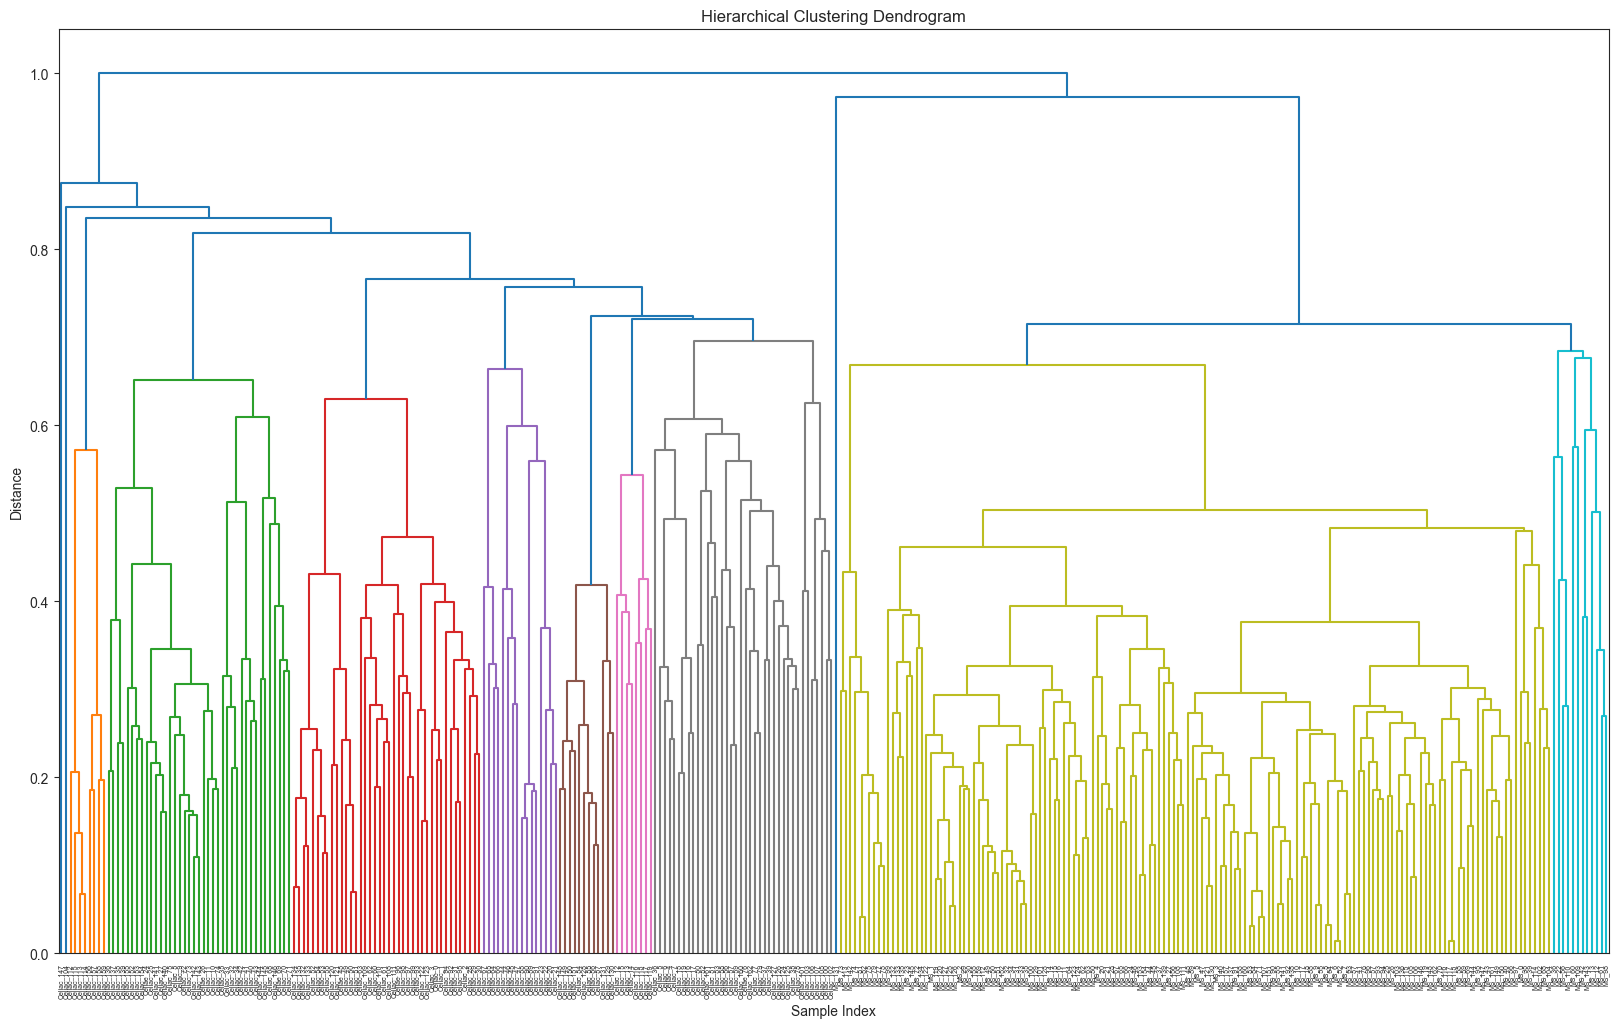

In [36]:
# Create a dendrogram to visualize the clustering
plt.figure(figsize=(20, 12))
dendro = dendrogram(linkage_matrix, labels=[f'Celiac_{i}' for i in range(len(df_celiac_filtered))] + [f'MS_{i}' for i in range(len(df_ms_filtered))])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [37]:
# 1. Change the `method` parameter in the `linkage` function to 'single', 'complete', or 'average' and observe the differences.
# 2. Modify the `color_threshold` to different values (e.g., 0.5, 0.9) to see how it affects the coloring of clusters.
# 3. Experiment with different `above_threshold_color` values such as 'blue', 'green', or 'black'.
# 4. Change the `figsize` to (16, 10) or (8, 6) to see the effect on the plot size.
# 5. Customize the `leaf_rotation` and `leaf_font_size` for better visual appeal.
# 6. Add annotations or markers to highlight specific clusters or branches.
# 7. Save the dendrogram plot as an image file using `plt.savefig('dendrogram.png')`.


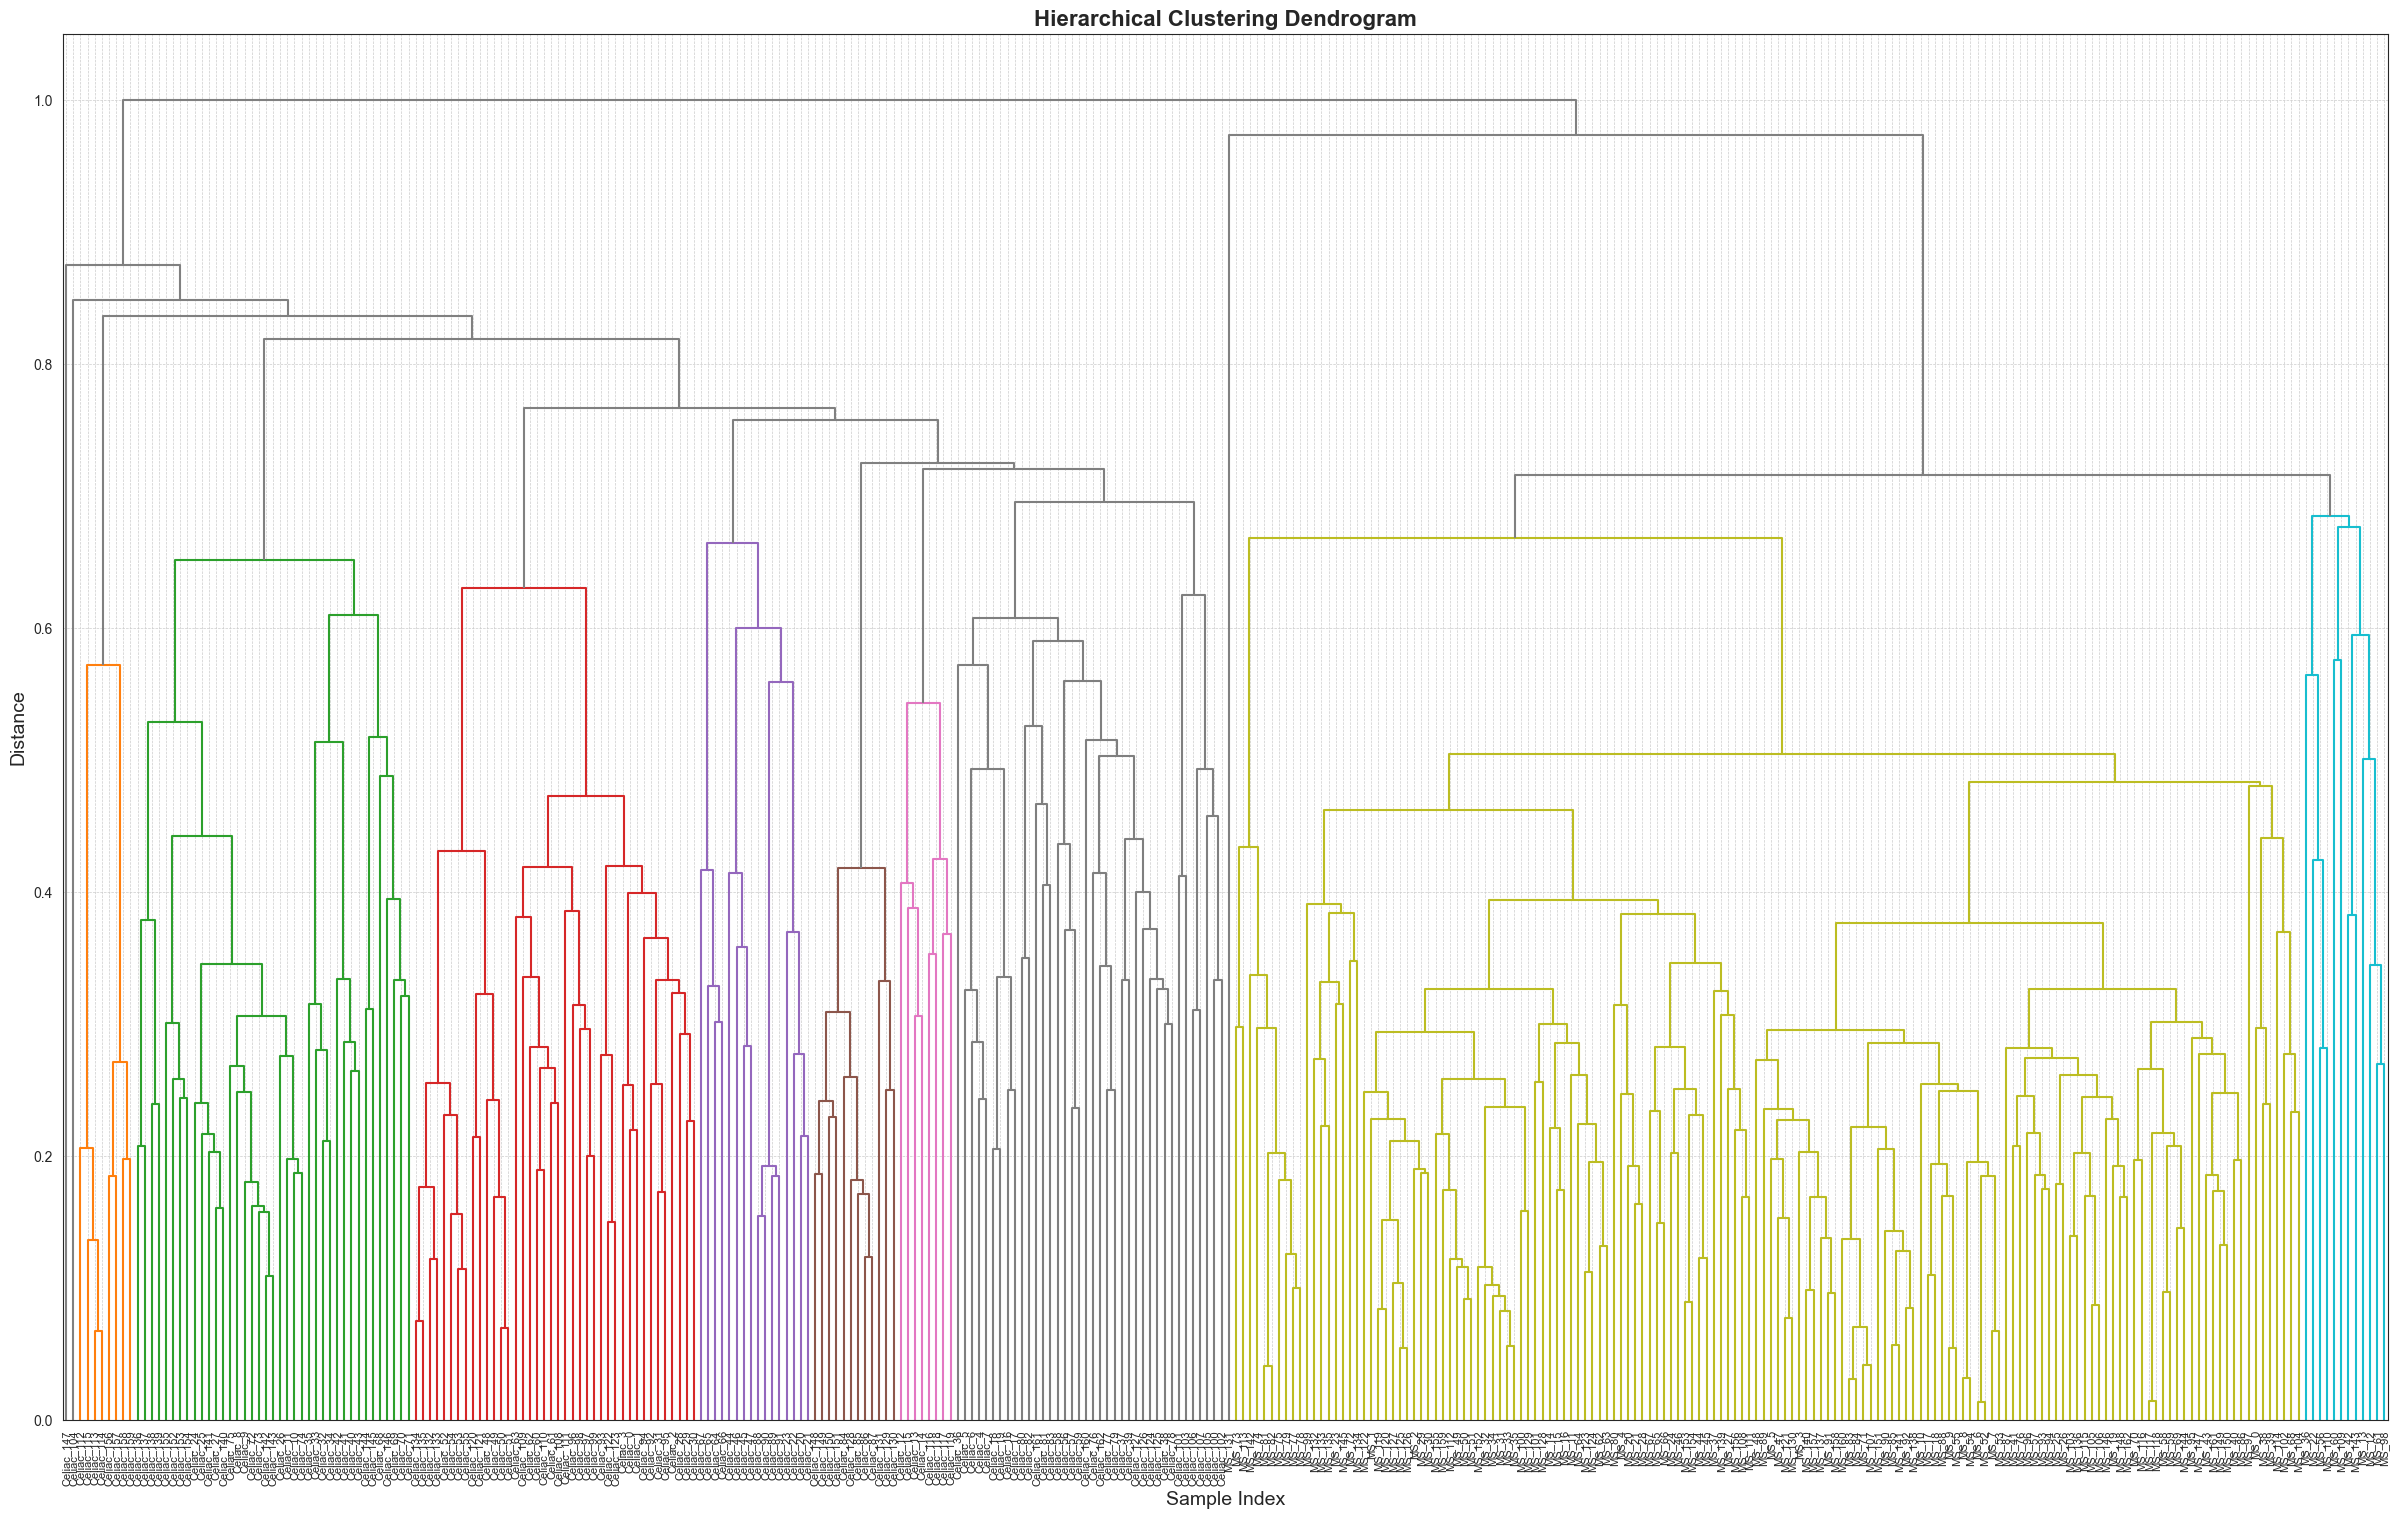

In [38]:
# Customize the dendrogram plot

# Set style
sns.set_style("white")
plt.figure(figsize=(30, 18))
dendro = dendrogram(
    linkage_matrix,
    labels=[f'Celiac_{i}' for i in range(len(df_celiac_filtered))] + [f'MS_{i}' for i in range(len(df_ms_filtered))],
    leaf_rotation=90,  # Rotate the leaf labels for better readability
    leaf_font_size=8,  # Set the font size for leaf labels
    color_threshold=0.7 * max(linkage_matrix[:, 2]),  # Set color threshold for clusters
    above_threshold_color='gray',  # Color for branches above the threshold
)

# Set the title and axis labels with custom font sizes
plt.title('Hierarchical Clustering Dendrogram', fontsize=16, fontweight='bold')
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Distance', fontsize=14)

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

In [39]:
len(bray_curtis_matrix)

326

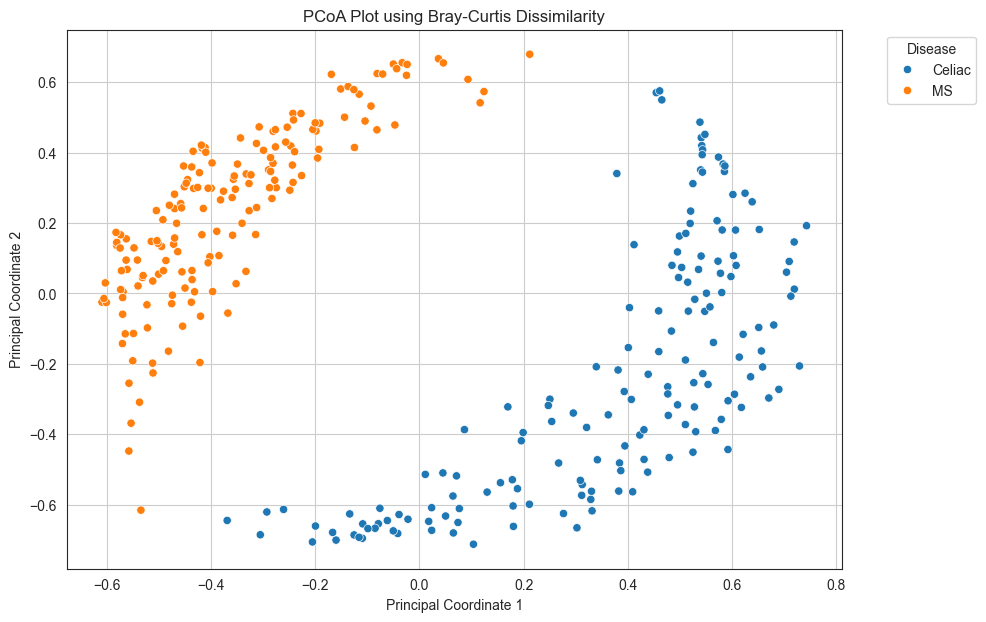

In [40]:
# Principal Coordinates Analysis (PCoA) using Bray-Curtis dissimilarity
from sklearn.manifold import MDS

# Fit MDS to the Bray-Curtis dissimilarity matrix
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coords = mds.fit_transform(bray_curtis_matrix)

# Create a DataFrame for the PCoA coordinates
df_pcoa = pd.DataFrame(mds_coords, columns=['PC1', 'PC2'])
#df_pcoa['Sample'] = df_celiac_common['Unnamed: 0'].tolist() + df_ms_common['Unnamed: 0'].tolist()

# Add a column to indicate disease type
df_pcoa['Disease'] = ['Celiac'] * len(df_celiac_filtered) + ['MS'] * len(df_ms_filtered)

# Plot the PCoA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Disease', data=df_pcoa, palette='tab10')
plt.title('PCoA Plot using Bray-Curtis Dissimilarity')
plt.xlabel('Principal Coordinate 1')
plt.ylabel('Principal Coordinate 2')
plt.grid()
plt.legend(title='Disease', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()